# Assigment 2 - SMUL (Low-Level features and timbre characterization)

*   List item
*   List item



## System Preparation

### Import / Upgrade packages

In [0]:
!pip install --upgrade pip           #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy         #upgrade numpy package
!pip install --upgrade pandas        #upgrade pandas package
!pip install --upgrade librosa       #upgrade librosa package
!pip install --upgrade essentia      #upgrade essentia package
!pip install --upgrade google        #upgrade google package

In [0]:
# from __future__ import print_function
# import numpy as np
# import scipy
# import librosa
# import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import essentia
import essentia.standard as es
from essentia.standard import *
import sys
from pylab import plot, show, figure, imshow
import time
import json
from itertools import chain
import shutil
import wave
import contextlib

###  Mount drive to get files

In [0]:
# from google.colab import drive
# from google.colab import files

# drive.mount('/content/drive')
# #drive.mount("/content/drive", force_remount=True)

In [0]:
# !ls drive/'My Drive'/'[Σχολή]'/Erasmus/'FEUP - Multimedia'/Original > files.txt
# list all sound files
final_list = ['acco_gref_mg_qu_mf_sol2_12', 'acco_gref_mg_qu_mf_sol3_12', 'acco_gref_mg_qu_mf_sol4_12', 'acco_gref_mg_qu_mf_sol5_1', 'acco_gref_mg_se_mf_sol0_12', 
              'acco_gref_mg_se_mf_sol1_12', 'acco_gref_mg_se_mf_sol2_12', 'acco_gref_mg_se_mf_sol3_12', 'acco_gref_mg_se_mf_sol4_12', 'bsn_gref_mf_sol1_12', 
              'bsn_gref_mf_sol2_12', 'bsn_gref_mf_sol3_12', 'cb_d_gref_mf_sol1_12', 'cb_d_gref_mf_sol2_12', 'cb_g_gref_mf_sol1_12', 'cb_g_gref_mf_sol2_12', 
              'cb_g_gref_mf_sol3_12', 'clsb_gref_mf_sol2_12', 'clsb_gref_mf_sol3_12', 'clsb_gref_mf_sol4_12', 'clsb_gref_mf_sol5_12', 'fltu_gref_mf_sol3_12', 
              'fltu_gref_mf_sol4_12', 'fltu_gref_mf_sol5_12', 'gui_gref_a_mf_sol2_12', 'gui_gref_b_mf_sol3_12', 'gui_gref_d_mf_sol2_12', 'gui_gref_d_mf_sol3_12', 
              'gui_gref_el_mf_sol1_12', 'gui_gref_el_mf_sol2_12', 'gui_gref_e_mf_sol3_12', 'gui_gref_e_mf_sol4_12', 'gui_gref_g_mf_sol2_12', 'gui_gref_g_mf_sol3_12', 
              'harp_gref_mf_sol0_12', 'harp_gref_mf_sol1_12', 'harp_gref_mf_sol2_12', 'harp_gref_mf_sol3_12', 'harp_gref_mf_sol4_12', 'harp_gref_mf_sol5_12', 
              'harp_gref_mf_sol6_12', 'others_101137__cgeffex__Organ_play-ball-old1', 'others_101137__cgeffex__Organ_play-ball', 'others_158628__Hammond-tonewheel-organ', 
              'others_168578_wah-clavinet-funky', 'others_196006__corsica-s__fender', 'others_208055__ueffects__deep-noise', 'others_25483__raggaman__rhodes-loop-01-116', 
              'per_102802__mhc__acoustic-tom6', 'per_117005__cbeeching__soft-cymbal', 'per_132585__rob10__kick-drum-e', 'per_139501__robertmcdonald__big-hit-1', 
              'per_173838__rocknessmonster89__tom-high', 'per_183109__dwsd__prc-phat909roomtom', 'per_212208__alexthegr81__tapesnare-15', 'per_34828__zin__hi-snare-1', 
              'per_39663__markgia__cymbal-swish-long', 'per_41439__sandyrb__srbm-tom-003', 'per_56436__surfjira__kick-feltbeater-medium', 'per_56454__surfjira__snare-rimshot-hard3', 
              'per_56461__surfjira__tom1-medium', 'per_56471__surfjira__tom2-medium', 'per_86334__zgump__tom-0104', 'per_snare', 'sax_gref_mf_sol2_12', 'sax_gref_mf_sol3_12', 
              'sax_gref_mf_sol4_12', 'tbtb_gref_mf_sol1_12', 'tbtb_gref_mf_sol2_12', 'tbtb_gref_mf_sol3_12', 'trpu_gref_mf_sol2_12', 'trpu_gref_mf_sol3_12', 'trpu_gref_mf_sol4_12', 
              'tubb_gref_mf_sol0_12', 'tubb_gref_mf_sol1_12', 'vcl_gref_a_mf_sol3_12', 'vcl_gref_a_mf_sol4_12', 'vcl_gref_c_mf_sol1_12', 'vcl_gref_c_mf_sol2_12', 
              'vcl_gref_d_mf_sol2_12', 'vcl_gref_d_mf_sol3_12', 'vcl_gref_g_mf_sol1_12', 'vcl_gref_g_mf_sol2_12', 'vln_gref_a_mf_sol4_12', 'vln_gref_a_mf_sol5_12', 
              'vln_gref_d_mf_sol3_12', 'vln_gref_d_mf_sol4_12', 'vln_gref_e_mf_sol4_12', 'vln_gref_e_mf_sol5_12', 'vln_gref_g_mf_sol2_12', 'vln_gref_g_mf_sol3_12']

## Task1

Please pick 2 descriptors by group (one from time-domain and another from frequency-domain), depart from the formula and explain the expected values for a sinusoid and white noise. Calculate these values and comment on your results. If they’re not implemented in your software library, please find that implementation in another library (e.g. MPEG7 Matlab) and use it.

### Zero crossing rate

Zero crossing rate of each frame is calculated as:
\begin{equation*}
 z_i = \frac{1}{2N}\sum_{n=0}^{N-1} |sgn(x_i[n]) - sgn(x_i[n - 1])|
\end{equation*} 


where xi[n] = 0,1,...N-1  be the sample of the i frame

Calculation in python would be:
\begin{equation*}
z[n] = 0.5 * np.mean(np.abs(np.diff(np.sign(x[np.arange(i_{start}, i_{stop} + 1)]))))
\end{equation*} 


#### Explanation - Zero crossing rate for sinusoid

To explain better the expected values for sinusoid, let's look closer at the formula. Signum function returns either -1 for negative x, 0 for 0 or +1 for positive x. For the sinus function we will get the the same amount of 0,1,-1 (because it is a periodical function). The difference between 2 neighbour values will be either 2,1 or 0. At most cases we get 0 and then depending on the frequency we get some values of 2. Lower freqency is, lower amount of value 2. Finally, the mean value will be very close to zero. If the frequency is low, we will be closer to 0 than for higher frequencies. 

\begin{equation*}
 z_i = \frac{1}{2N}\sum_{n=0}^{N-1} |sgn(x_i[n]) - sgn(x_i[n - 1])| = \frac{1}{2N} ( m*|1-1| +m*|-1 - (-1)| + k*|-1 - 1| + k*|-1 - 1|) = \frac{1}{2N} (2k*2)  = \frac{2k}{N} = \frac{2k}{2*m + 2*k} = \frac{k}{m + k}
\end{equation*} 

*   k is the number of samples of transitions between positive and negative values of the signal
*   m is the number of samples on positive or negative axis y of signal
*   it is clear that:
    \begin{equation*}
    m > k
    \end{equation*} 

#### Explanation - Zero crossing rate for white noise


White noise is a signal made of uncorrelated samples, such as the numbers produced by a random generator. It contains all frequencies in equal proportion.

It is not periodic but the distribution of numbers is regular. It means that by calculation the difference between values, we will get approximately the same amount of 1,2 and 0 so the mean value will be around 1 (because (1+2+0)/3 = 1). Finally, we can not forget the division by 2 therefore the final value for zero crossing rate of white noise will be around 0.5.

\begin{equation*}
 z_i = \frac{1}{2N}\sum_{n=0}^{N-1} |sgn(x_i[n]) - sgn(x_i[n - 1])| = \frac{1}{2N} ( m*|1-1| +m*|-1 - (-1)| + m*|-1 - 1| + m*|-1 - 1| ) = \frac{1}{2N} (2m*2)  = \frac{2m}{N} = \frac{2*m}{4*m} = \frac{1}{2}
\end{equation*} 


### Spectral centroid

Spectral centroid is the barycenter of the spectrum. A higher value of SC corresponds to more energy of the signal being concentrated within higher frequencies. The computation of the ith frame is folowing:
\begin{equation*}
 Z_i = \frac{\sum_{k=0}^{k=N-1}k * X_i(k)}{\sum_{k=0}^{k=N-1}X_i(k)} 
\end{equation*}

Let Xi(k) be the DFT coefficients of the sequence.

Calculation in matlab:
\begin{equation*} np.sum(yf*xf) / np.sum(yf)
\end{equation*}

#### Explanation for sinusoid

To better understand this formula, let's take a sinus wave of 3 Hz. It is clear that in the spectrum the highest amplitude (magnitude) will be for 3 Hz and for other frequencies the amlplitude will be very low (around 0). Then, we will get following:
\begin{equation*}
 Z_i = \frac{\sum_{k=0}^{k=N-1}k * X_i(k)}{\sum_{k=0}^{k=N-1}X_i(k)} = \frac{0*0 + 1*0 + 2*0 + 3*magnitude... (N-1)*0}{0+0+0+ magnitude + .... + 0 } = \frac{3*magnitude}{magnitude} = 3 Hz
\end{equation*}

As we can see we got the given frequency of the sinusoid as a result of the formula of spectral centroid.

#### Explanation for white noise

In spectrum of the whitenoise there are all frequencies equally covered so the spectrum is flat and magnitude is the same for each frequency. In this case, we will get following result:
\begin{equation*}
 Z_i = \frac{\sum_{k=0}^{k=N-1}k * X_i(k)}{\sum_{k=0}^{k=N-1}X_i(k)} = \frac{0*aml + 1*aml + 2*aml + 3*aml... (N-1)*aml}{aml*N} = \frac{aml *(0+1 + 2 +.. + (N-1))}{aml*N} = \frac{0+1 + 2 +.. + (N-1)}{N}= \frac{(N)*(0+(N-1))}{2N}=\frac{N-1}{2}
\end{equation*}

The final result is N-1/2 where N is the number of coeficients of the signal.

## Task 2

Implement a function to obtain, for a given audio file, the mentioned set of instantaneous descriptors (1,2,6-9).
To start, use similar analysis parameters: windowsize = 60 ms, hopsize=10 ms, no zero padding.
Create plots to visualize the extracted instantaneous low-level descriptors and study their evolution for a small set of instrument samples (e.g. percussive, string, wind instrument). Play around with the STFT analysis parameters (windowsize, hopsize, etc.), and try to obtain the best compromise.


### Load example file

In [0]:
'''
The function returns a tuple (3 items)
(sound_path, plots_path, file_type_extension)
'''
def get_paths():
    # fix path to match with the location of sound file
    # sound_path = "/content/drive/My Drive/FEUP - Multimedia/Original/"
    sound_path = "/content/drive/My Drive/[Σχολή]/Erasmus/FEUP - Multimedia/Original/"
    # fix path to match with the location you want to save the plots
    # plots_path = "/content/drive/My Drive/FEUP - Multimedia/plots/"
    plots_path = "/content/drive/My Drive/[Σχολή]/Erasmus/FEUP - Multimedia/plots/"
    # fix extension to match with the type of sound file
    file_type_extension = '.wav'
    # fix statistics to match with the type of sound file
    statistics = "/content/drive/My Drive/[Σχολή]/Erasmus/FEUP - Multimedia/statistics/plots/"
    # statistics = "/content/drive/My Drive/FEUP - Multimedia/statistics/"
    return (sound_path, plots_path, statistics, file_type_extension)

In [0]:
path, _ , _ , ext = get_paths()
filename = 'gui_gref_d_mf_sol3_12'
full_path = path+filename+ext

# instantiating the audio loader
MonoLoader = es.MonoLoader(filename=full_path)

# actually perform loading
MonoAudio = MonoLoader()
ipd.Audio(full_path)

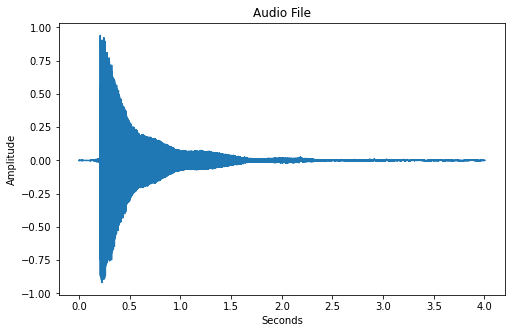

In [0]:
plt.rcParams['figure.figsize'] = (8, 5) # set plot sizes to something larger than default
seconds = []
for i in range(0,(len(MonoAudio))):
    seconds.append(i/44100)
plt.plot(seconds ,MonoAudio)
plt.title("Audio File")
plt.xlabel('Seconds')
plt.ylabel('Amplitude')
plt.show()

In [0]:
# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
statsFeatures, statsFeatures_frames = es.MusicExtractor(lowlevelStats=['mean',
                                                        'stdev',
                                                        'min',
                                                        'max'])(full_path)
features = es.Extractor(lowLevel=True,
                        highLevel=False,
                        midLevel=False,
                        lowLevelFrameSize=512,
                        lowLevelHopSize=256)(MonoAudio)

# Uncomment line below to see all feature names in the pool in a sorted order
# for i in sorted(features.descriptorNames()):
#     print (i)

### Low level descriptors

In [0]:
def analyze_sound_instant_desc(audio_file):

    # instantiating the audio loader
    MonoLoader = essentia.standard.MonoLoader(filename=audio_file)
    # actually perform loading
    MonoAudio = MonoLoader()

    # extract low level features
    features = es.Extractor(lowLevel =True,
                            highLevel=False,
                            midLevel =False,
                            lowLevelFrameSize=2048,
                            lowLevelHopSize=1024)(MonoAudio)

    statsFeatures, 
    statsFeatures_frames = es.MusicExtractor(lowlevelStats=['mean',
                                                            'stdev',
                                                            'min',
                                                            'max'])(audio_file)
    
    # gather results
    rms = features['lowLevel.spectral_rms'] 
    zeroCross = features['lowLevel.zerocrossingrate']
    tempCentroid = features['lowLevel.spectral_centroid'] 
    spread = features['lowLevel.spectral_spread']
    flux = features['lowLevel.spectral_flux']
    flatness = features['lowLevel.spectral_flatness_db']
    
    # pack things in a dictionary
    ret_dict = {
        "spectral_rms" : rms,
        "zero_crossing_rate" : zeroCross,
        "spectral_centroid" : tempCentroid,
        "spectral_spread" : spread,
        "spectral_flux" : flux,
        "spectral_flatness_db" : flatness
    }

    return ret_dict


### Generate plots

In [0]:
def return_seconds(x_axis, waveform=False, sampleRate=44100, frameSize=2048, hopSize=1024):
    seconds = []
    for i in range(0,len(x_axis)):
        if not waveform:
            bottom_limit= (i*hopSize)/sampleRate
            upper_limit = (i*hopSize+frameSize)/sampleRate
            mid = (upper_limit+bottom_limit)/2
        else:
            mid = i/sampleRate
        seconds.append(mid)

    return seconds

In [0]:
# use with save = False if you don't want to save plot file
def create_and_save_plots(audio_list, save=True):
    plots_list = ['spectral_rms', 
                'zero_crossing_rate', 
                'spectral_centroid', 
                'spectral_spread', 
                'spectral_flux', 
                'spectral_flatness_db']

    sound_path, plots_path, _ , extension = get_paths()

    # for every audio file generate plots for low level descriptors
    for audio_file in audio_list:
        global_desc = analyze_sound_instant_desc(sound_path+audio_file+extension)
        for i in plots_list:
            plt.title(audio_file+'_'+i)
            plt.xlabel('Seconds')
            plt.ylabel('Amplitude')
            seconds = return_seconds(global_desc[i])
            plt.plot(seconds, global_desc[i])
            fig = plt.gcf()
            if save:
                fig.savefig(plots_path+audio_file+'_'+i)
            plt.show()
    
        # instantiating the audio loader
        MonoLoader = es.MonoLoader(filename=sound_path+audio_file+extension)
        # actually perform loading
        MonoAudio = MonoLoader()
        plt.title(audio_file+'_waveform')
        seconds = return_seconds(MonoAudio, waveform=True)
        plt.xlabel('Seconds')
        plt.ylabel('Amplitude')
        plt.plot(seconds, MonoAudio)
        fig = plt.gcf()
        if save:
            fig.savefig(plots_path+audio_file+'_waveform')
        plt.show()

In [0]:
######## # with open('files.txt') as f:
######## #     raw_list = list(f)
######## 
######## # final_list = []
######## # for i in raw_list:
######## #     temp = i.strip('\n')
######## #     final_list.append(temp.rstrip('.wav'))
######## 
######## # final_list

# COMMENT LINE BELOW ONLY IF YOU DON'T WANT TO REGENERATE PLOT FILES
create_and_save_plots(final_list, save = True)

### Test

In [0]:
# test function with one sound
sound_list = ['gui_gref_d_mf_sol3_12']
create_and_save_plots(sound_list, save=False)

### Comment results

## Task 3

Implement a function to obtain, for a given audio file, the mentioned set of global descriptors (3,4,5), as well as statistics of the previous instantaneous descriptors (mean, standard deviation, min, max).
Study the values of these descriptors for the previous instrumental samples and analyse how they represent the following aspects: percussive/non-percussive sounds, sustained/non sustained, low-pitch/high pitch, and instrument.

### Preparing functions

In [0]:
desired_stats= ['lowlevel.spectral_centroid.mean', 'lowlevel.spectral_centroid.max','lowlevel.spectral_centroid.min', 'lowlevel.spectral_centroid.stdev',
                'lowlevel.spectral_flux.max', 'lowlevel.spectral_flux.mean','lowlevel.spectral_flux.min', 'lowlevel.spectral_flux.stdev', 'lowlevel.spectral_rms.max',
                'lowlevel.spectral_rms.mean','lowlevel.spectral_rms.min', 'lowlevel.spectral_rms.stdev', 'lowlevel.spectral_spread.max', 'lowlevel.spectral_spread.mean',
                'lowlevel.spectral_spread.min', 'lowlevel.spectral_spread.stdev', 'lowlevel.zerocrossingrate.max', 'lowlevel.zerocrossingrate.mean', 'lowlevel.zerocrossingrate.min',
                'lowlevel.zerocrossingrate.stdev', 'lowlevel.barkbands_flatness_db.max', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.min',
                'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.erbbands_flatness_db.max', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.min',
                'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.melbands_flatness_db.max', 'lowlevel.melbands_flatness_db.mean', 'lowlevel.melbands_flatness_db.stdev',
                'lowlevel.melbands_flatness_db.min']

### Functions definitions

In [0]:
'''
Description: The function below generates lowlevel statistics for a given file
Input: Path of audio file (string)
Output: Dictionary with low level statistics, that contains all of the desired_stats listed above {string(key) : float(value)}
'''
def save_instant_desc_stats(audio_file, sampleRate = 44100,
                            frameSize = 2048, hopSize = 1024,
                            windowType = 'hann'):
    sound_path, plots_path, _ , extension = get_paths()
    filename=sound_path+audio_file+extension

    statsFeatures, statsFeatures_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev', 'min', 'max'],
                                                            lowlevelHopSize=hopSize,
                                                            lowlevelFrameSize=frameSize,
                                                            lowlevelWindowType=windowType)(filename)

    temp_dict = {}
    for i in desired_stats:
        temp_dict[audio_file+'.'+i] = statsFeatures[i]
        # print(statsFeatures[i])
    return temp_dict

In [0]:
'''
Description: The function below analyzes all given audio files from a list and returns a dictionary

Input: 
    audio_list <list>:  list of the names of all audio files contained in the sound_path 
                        (modify the desired path in function get_paths). 
                        Names should not contain extensions (default = final_list)
    sampleRate <int>: the sampleRate of the analysis (default = 44100)
    frameSize <int>: frameSize of the analysis (default = 2048)
    hopSize <int>: hopSize of the analysis (default = 1024)
    windowType <string>: windowType of the analysis (default = 'hann')
    save <boolean>: save flag, if true then the statistics and descriptors are saved in a .json file

Output: Dictionary with global descriptors and low level statistics, that contains all of the desired_stats listed above {string(key) : float(value)} 
'''
def analyze_sound_global_desc(audio_list = final_list, sampleRate = 44100,
                              frameSize = 2048, hopSize = 1024,
                              windowType = 'hann', save=True):

    statsDictionary = {}

    for i in audio_list:

        sound_path, plots_path, _, extension = get_paths()
        filename=sound_path+i+extension

        # instantiating the audio loader
        MonoLoader = es.MonoLoader(filename=filename)
        # actually perform loading
        MonoAudio = MonoLoader()
        
        statistics = {}
        statistics = save_instant_desc_stats(audio_file = i, 
                                             frameSize = frameSize, 
                                             hopSize = hopSize, 
                                             windowType = windowType)

        # merge dictionaries
        statsDictionary.update(statistics)

        features = es.Extractor(lowLevel=True,
                                highLevel=True,
                                midLevel=True)(MonoAudio)
        # frame algorithms
        frames = es.FrameGenerator(audio = MonoAudio, frameSize = frameSize, hopSize = hopSize)
        window = es.Windowing(size = frameSize, zeroPadding = 0, type = windowType)
        spectrum = es.Spectrum(size = frameSize)

        envelope = es.Envelope()
        file_envelope = envelope(MonoAudio)

        # temporal centroid
        centroid = es.Centroid()
        result1 = centroid(file_envelope)

        # effective duration
        effectiveduration = es.EffectiveDuration()
        result2 = effectiveduration(file_envelope)

        # log attack time
        logattacktime = es.LogAttackTime()
        result3 = logattacktime(file_envelope)
        
        statsDictionary[i+'.centroid'] = result1
        statsDictionary[i+'.effectiveduration'] = result2
        
        with contextlib.closing(wave.open(filename,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            if (duration*0.60 < result2) :
                my_char = "sustained"
            else:
                my_char = "not sustained"

        statsDictionary[i+'.sustained'] = my_char

        for res in range(3):
            point = result3[res]
            statsDictionary[i+'.logattacktime.logpoint'+str(res+1)] = point
        for res in range(3):
            point = 10**result3[res]
            statsDictionary[i+'.logattacktime.decimalpoint'+str(res+1)] = point

    return statsDictionary

### Performing Analysis

In [0]:
# get statistics.json file with already performed analysis
# _, plots_path, _ , _ = get_paths()
# stats_file = 'statistics.json'
# f = open(plots_path+stats_file, "r")
i = 12

In [0]:
# # UNCOMMENT ALL LINES BELOW IF YOU WANT TO REGENERATE STATS FOR LOW LEVEL DESCRIPTORS
# # FILE WILL BE PLACED IN PLOTS PATH

# statsDictionary = analyze_sound_global_desc(audio_list=['acco_gref_mg_qu_mf_sol2_12','harp_gref_mf_sol6_12']) # retrieve statistics
frameSize = 2048
hopSize = 256
statsDictionary = analyze_sound_global_desc(frameSize = frameSize, hopSize = hopSize) # retrieve statistics
f = open("statistics"+"_v"+str(i)+"_"+str(frameSize)+"_"+str(hopSize)+".json","w+") # open file
json.dump(statsDictionary, f) # save file
i += 1
# _, plots_path, _ , _ = get_paths()
# shutil.move('statistics.json', plots_path+'statistics.json') # move file to plots_path

In [0]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

_ , _ , stats , _ = get_paths()
# loading dataset
df = pd.read_csv('excelfile.csv')

# print(df)

In [0]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

_ , _ , stats , _ = get_paths()
# loading dataset
df = pd.read_csv('excelfile.csv')

# all the values/columbs in the CSV file
df.columns = [ 'name', 'percussion', 'name group', 'instrument', 'pitch', 'sustained', 'lowlevel.spectral_centroid.mean', 
              'lowlevel.spectral_centroid.max', 'lowlevel.spectral_centroid.min', 'lowlevel.spectral_centroid.stdev', 'lowlevel.spectral_flux.max', 
              'lowlevel.spectral_flux.mean', 'lowlevel.spectral_flux.min', 'lowlevel.spectral_flux.stdev', 'lowlevel.spectral_rms.max', 
              'lowlevel.spectral_rms.mean', 'lowlevel.spectral_rms.min', 'lowlevel.spectral_rms.stdev', 'lowlevel.spectral_spread.max', 
              'lowlevel.spectral_spread.mean', 'lowlevel.spectral_spread.min', 'lowlevel.spectral_spread.stdev', 'lowlevel.zerocrossingrate.max', 
              'lowlevel.zerocrossingrate.mean', 'lowlevel.zerocrossingrate.min', 'lowlevel.zerocrossingrate.stdev', 'lowlevel.barkbands_flatness_db.max', 
              'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.min', 'lowlevel.barkbands_flatness_db.stdev', 
              'lowlevel.erbbands_flatness_db.max', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.min', 
              'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.melbands_flatness_db.max', 'lowlevel.melbands_flatness_db.mean', 
              'lowlevel.melbands_flatness_db.stdev', 'lowlevel.melbands_flatness_db.min', 'centroid', 'effectiveduration', 
              'logattacktime.logpoint1', 'logattacktime.logpoint2', 'logattacktime.logpoint3', 'logattacktime.decimalpoint1', 
              'logattacktime.decimalpoint2', 'logattacktime.decimalpoint3' ] 

values = df.values

# all the pairs of descriptors that we will test
test = {
    "lowlevel.barkbands_flatness_db.mean": "lowlevel.spectral_flux.mean",
    "lowlevel.erbbands_flatness_db.mean": "lowlevel.spectral_flux.mean",
    "lowlevel.spectral_spread.mean": "lowlevel.spectral_flux.mean",
    "lowlevel.spectral_centroid.mean": "lowlevel.zerocrossingrate.mean",
    #"lowlevel.spectral_centroid.mean": "lowlevel.erbbands_flatness_db.mean",
    "effectiveduration": "logattacktime.logpoint3",
    "lowlevel.spectral_flux.mean" : "lowlevel.spectral_rms.mean",
    "lowlevel.spectral_rms.mean": "lowlevel.spectral_centroid.mean",
}

# instrument
col_instrument = {"acco": 'red', 
                      "harp": 'black',
                      "per": 'blue',
                      "bsn": 'green',
                      "sax": 'pink',
                      "gui": 'purple',
                      "trpu": 'yellow',
                      "vcl": 'orange'
                      }
# name group
col = {"percussive": 'red', "wind": 'black', "string": 'green', "others": 'purple'}

# pitch
col_pitch = {"high": 'red', "low": 'blue'}

# sustained
col_sustain = {"sustained": 'red', "not sustained": 'blue'}

col_perc = {"percussive": 'red', "nonpercussive": 'blue'}

test_plots = {"instrument" : col_instrument,
        "name group" : col,
        "pitch" : col_pitch,
        "sustained" : col_sustain,
        "percussion" : col_perc
        }

#### actual stuff

In [0]:
def scatterplot(df, x_dim, y_dim, col_dict,  name,  version):
    x = df[x_dim]
    y = df[y_dim]

    fig, ax = plt.subplots(figsize=(10, 5))

    #mylist = list(dict.fromkeys(df['name group']))
    mylist = list(dict.fromkeys(df[name]))

    colors_instruments = []
    for l in df[name]:
      colar_pom = 'white'
      if l in col_dict:
          colar_pom = col_dict[l]
      colors_instruments.append(colar_pom)  

    ax.scatter(x, y, alpha=0.70, color=colors_instruments)

    # adds a title and axes labels
    ax.set_xlabel(x_dim)
    ax.set_ylabel(y_dim)

    for group in mylist:
      if group in col_dict:
          plt.scatter([], [], c=col_dict[group], alpha=0.7,
                    label=group)

    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title=name)

    # adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.85)
    _ , _ , plots_path , _ = get_paths()
    filename = x_dim+'-'+y_dim + '.png'
    plots_path = plots_path + name +  '/v'+ str(version) +'/'
    plt.savefig(plots_path+filename)
    plt.show()

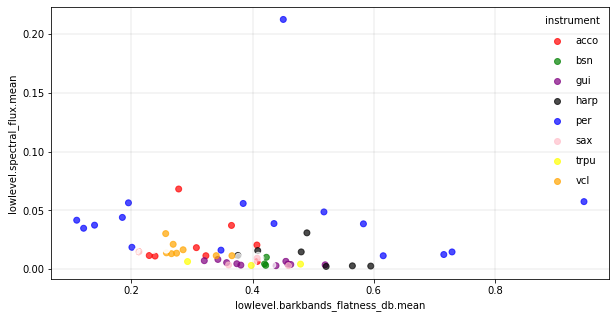

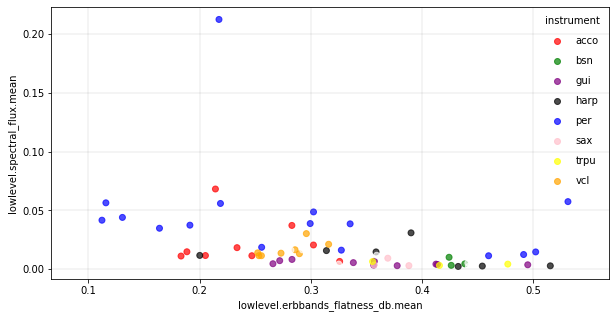

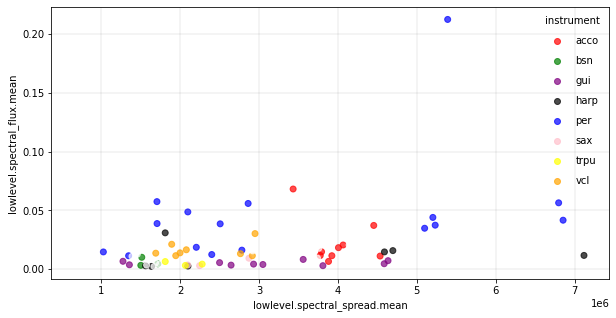

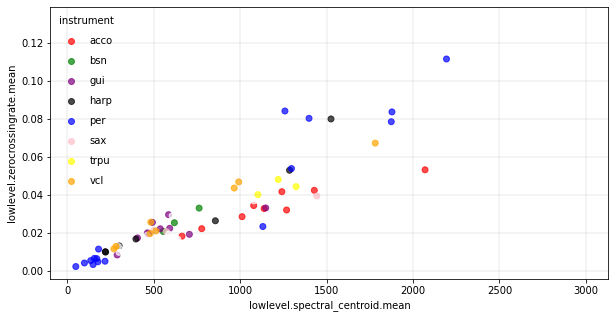

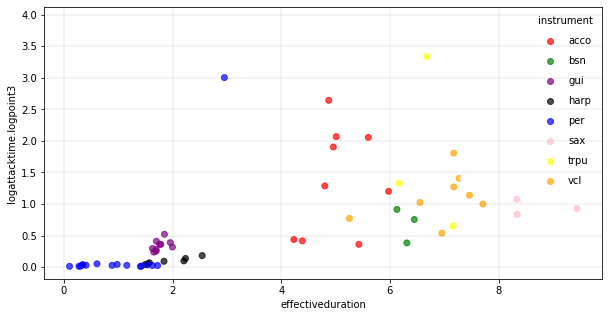

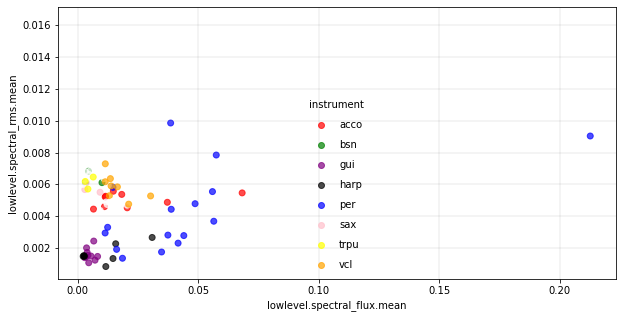

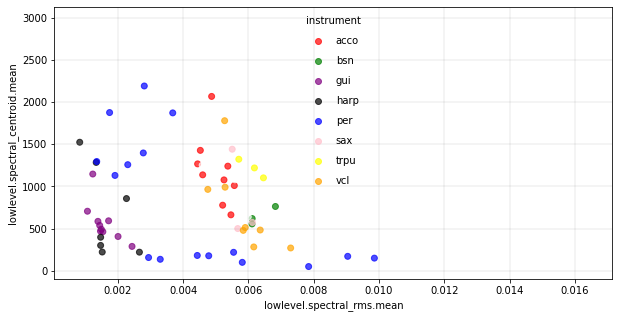

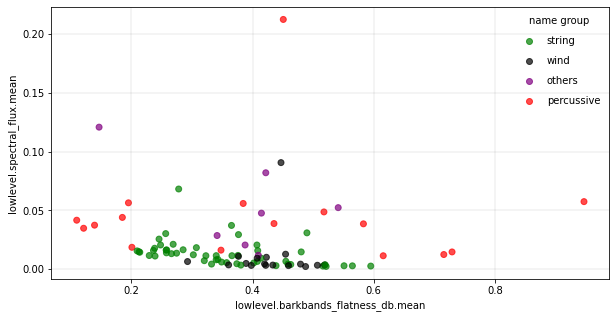

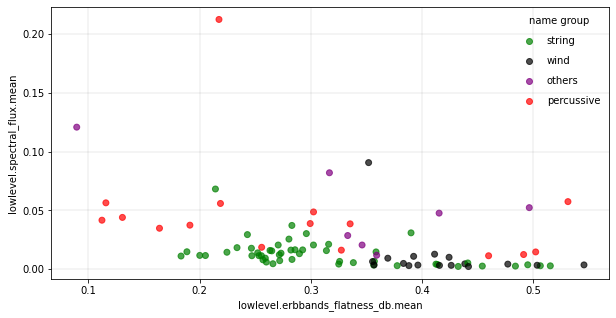

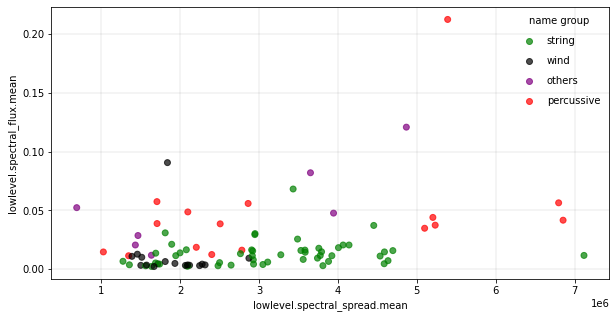

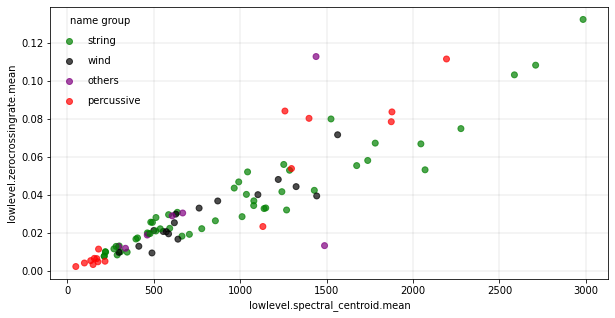

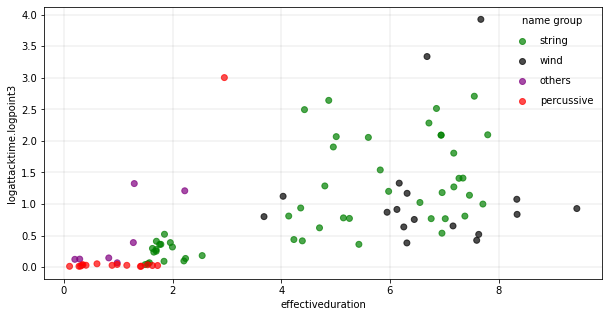

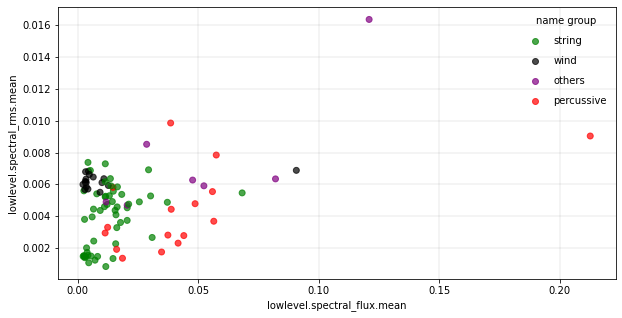

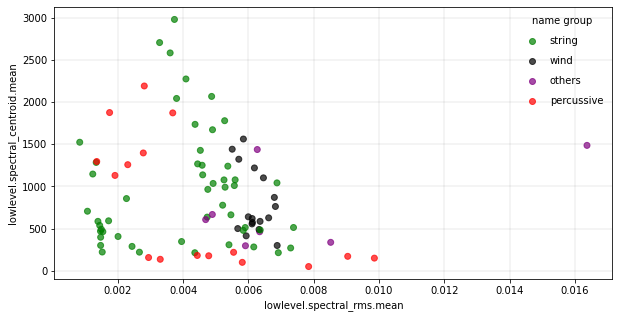

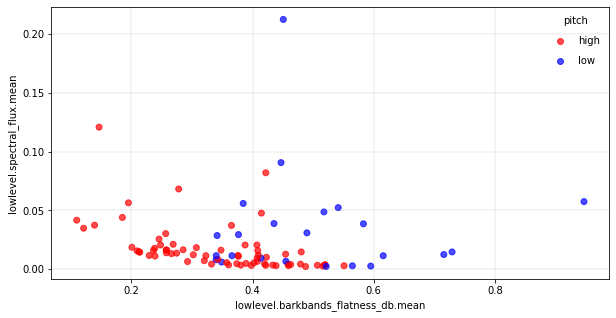

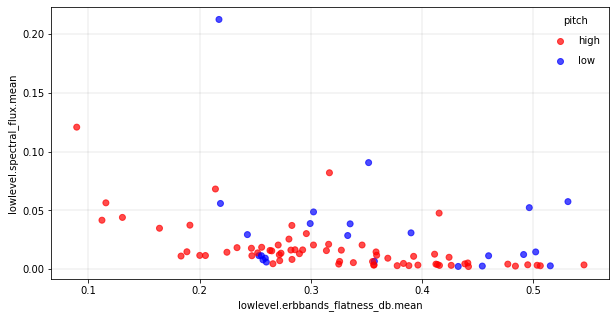

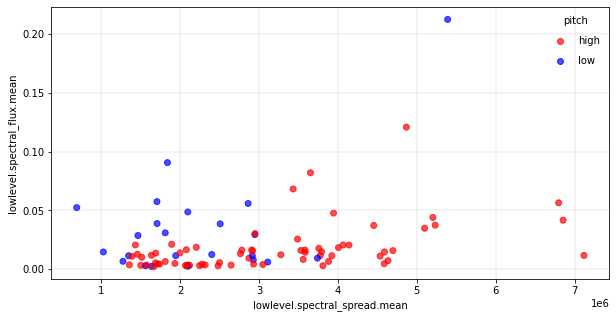

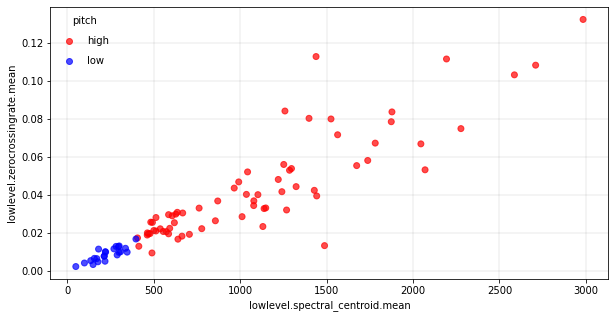

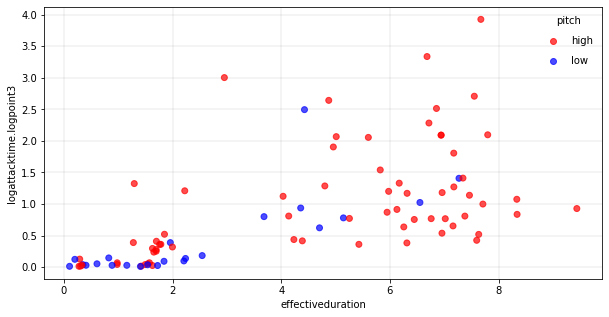

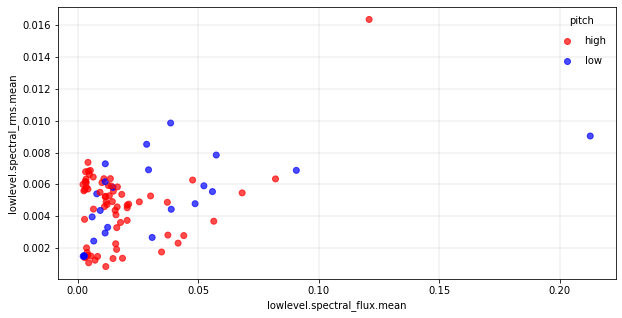

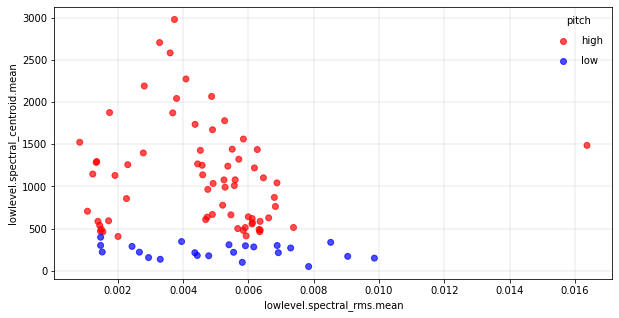

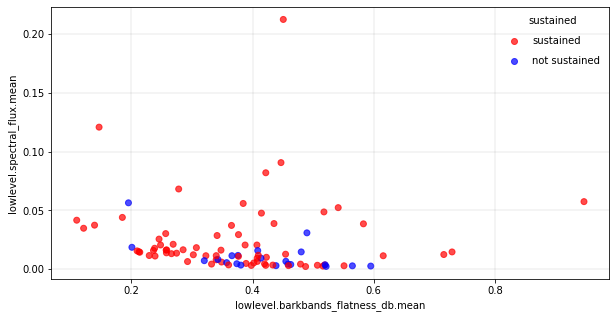

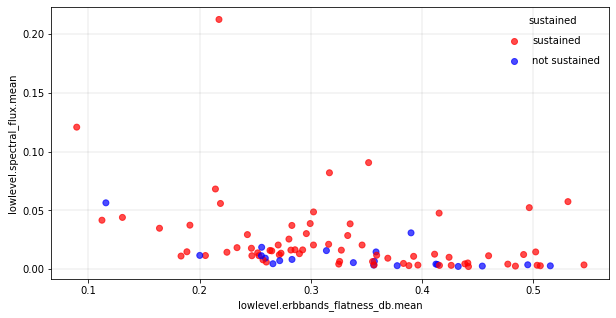

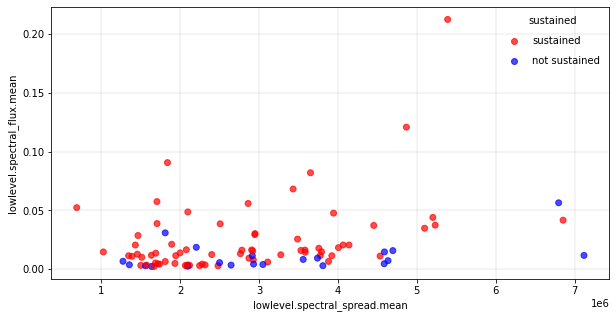

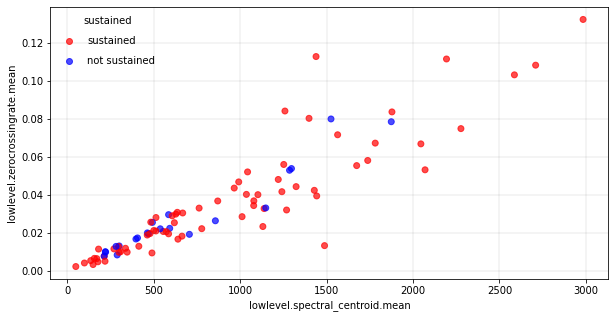

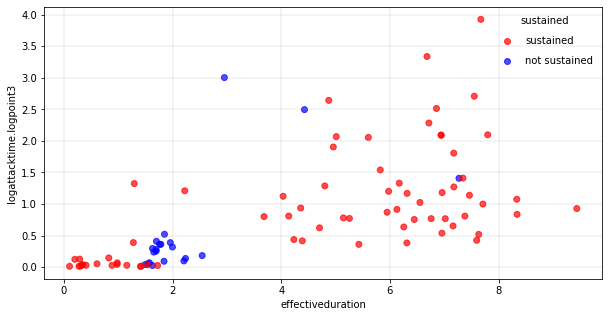

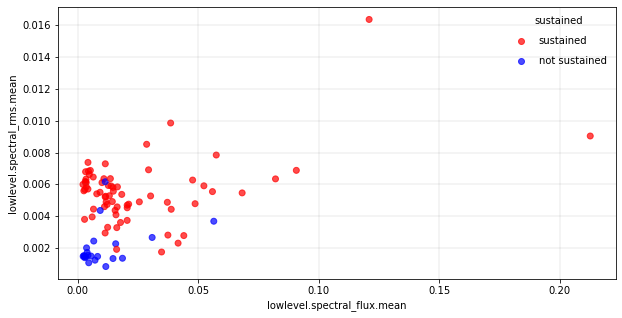

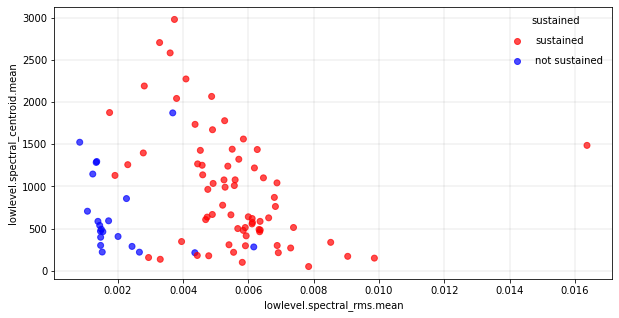

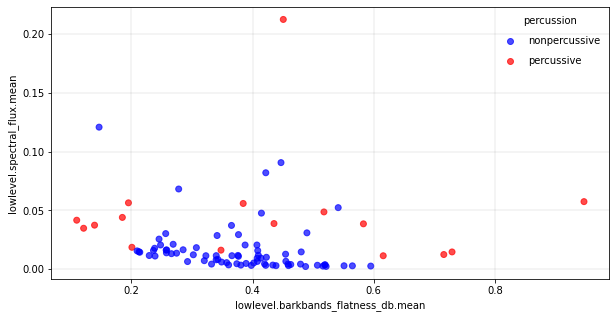

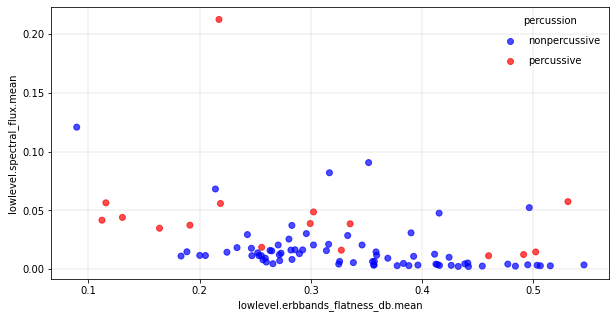

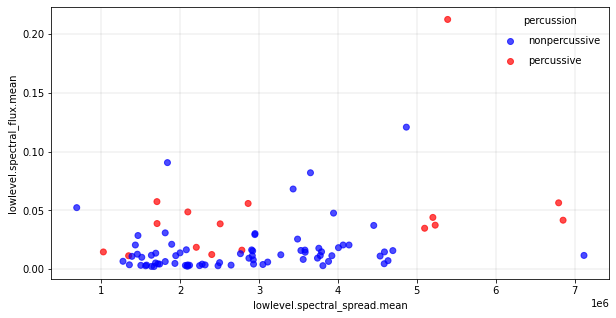

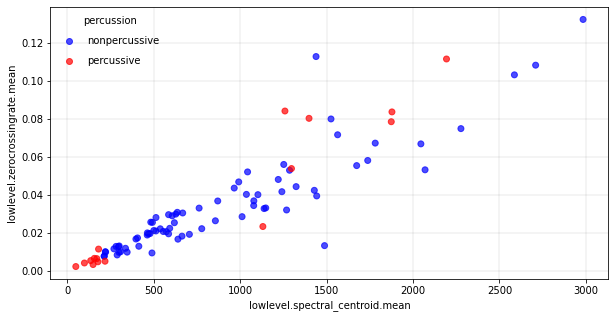

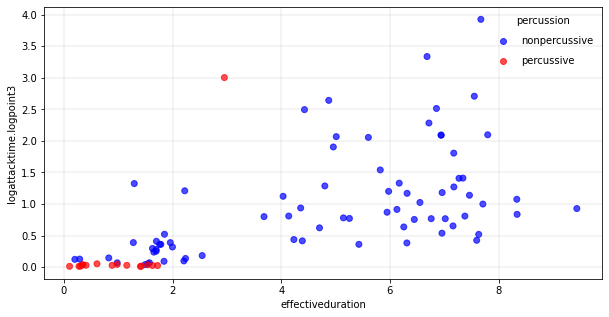

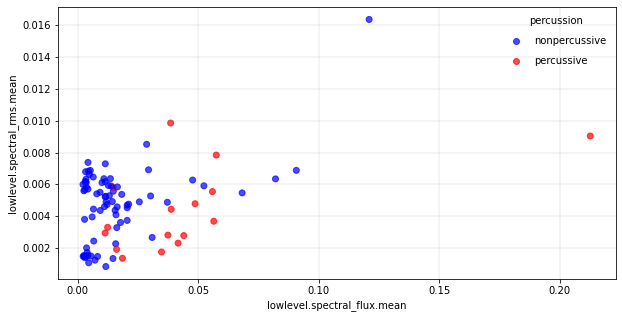

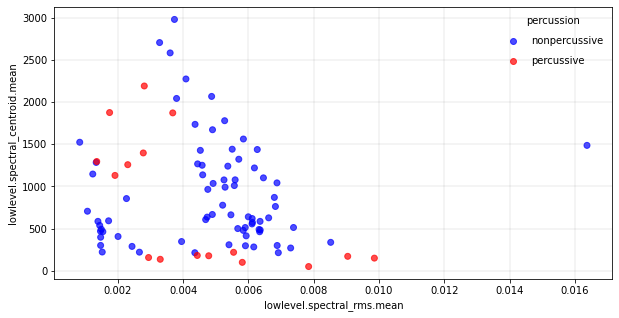

In [0]:
# defining an array of colors
for feature_key_name in test_plots: 
  version = 0
  for key in test:
      X_name = key
      Y_name = test[X_name]
      scatterplot(df, X_name, Y_name, test_plots[feature_key_name], feature_key_name, version)

## Task 4

Imagine and describe in a short paragraph (max 5/6 lines) a sound-based multimedia application for which you could use your previous work in this assignment.

Sound descriptors can be useful in many applications. The most important is the categorization of the sound using machine learning. Then, it can be used in instrument recognition that is about identifying the instruments involved or separating the music into one track per instrument. Last possible application would be in automatic music transcription that is able to convert the audio into symbolic notation (such as notes). 

## Task 5

#### Percussive classification results

In [0]:
import pandas as pd

percussiveA1 = (1 , 0.1) 
percussiveA2 = (2 , 0.1)

def decide_position( pointA , pointB , reqPoint):
	(aX,aY)  = pointA
	(bX, bY) = pointB
	(X,Y)	 = reqPoint
	position = ((bX - aX) * (Y - aY) - (bY - aY) * (X - aX))
	return position

stats = ['effectiveduration' , 'logattacktime.logpoint3', 'percussion']
# stats = ['lowlevel.spectral_centroid.mean' , 'lowlevel.zerocrossingrate.mean', 'percussion']
#					X				  , 			Y

df = pd.read_csv('excelfile.csv')

centroid = df[stats[0]]
zcr = df[stats[1]]
percussive = df[stats[2]]

coords_list = []
for i in range(0, len(centroid)):
	tup = (centroid[i], zcr[i])
	coords_list.append(tup)

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

true_percussive = 0
non_percussive = 0
pred_percussive = 0
pred_non_percussive = 0

for i in range(0, len(centroid)):
	if percussive[i] == "percussive":
		true_percussive += 1
	else: 
		non_percussive += 1

	(x,y) = coords_list[i]

	res = decide_position(percussiveA1, percussiveA2, (x,y))
	if res <= 0: # prediction: percussive
		pred_percussive += 1
		if percussive[i] == "percussive":
			true_positives += 1
		else:
			false_positives += 1
	else: # prediction: non percussive
		pred_non_percussive +=1
		if percussive[i] == "percussive":
			false_negatives += 1
		else:
			true_negatives += 1

print ("prediction percussive: ", pred_percussive)
print ("prediction non percussive: ", pred_non_percussive)
print ("actual percussive: ", true_percussive)
print ("actual non percussive: ", non_percussive)
print ("--------------------------------------------")
print ("true positives: ", true_positives)
print ("false positives: ", false_positives)
print ("false negatives: ", false_negatives)
print ("true negatives: ", true_negatives)

recall = true_positives / true_percussive
precision = true_positives / pred_percussive

F1_score = 2*(precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_percussive + non_percussive)
print ("--------------------------------------------")

print ("recall: ", recall)
print ("precision: ", precision)
print ("accuracy: ", accuracy)
print ("F1_score: ", F1_score)

#### Sustained classification results

In [0]:
import pandas as pd

sustainedA1 = (0 , 0.004) 
sustainedA2 = (0.06 , 0)

def decide_position( pointA , pointB , reqPoint):
	(aX,aY)  = pointA
	(bX, bY) = pointB
	(X,Y)	 = reqPoint
	position = ((bX - aX) * (Y - aY) - (bY - aY) * (X - aX))
	return position

stats = ['lowlevel.spectral_rms.mean' , 'lowlevel.spectral_flux.mean', 'sustained']
#					X				  , 			Y

df = pd.read_csv('excelfile.csv')

rms = df[stats[0]]
centroid = df[stats[1]]
sustained = df[stats[2]]

coords_list = []
for i in range(0, len(rms)):
	tup = (rms[i], centroid[i])
	coords_list.append(tup)

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

true_sustained = 0
non_sustained = 0
pred_sustained = 0
pred_non_sustained = 0

sust_predictions = []
non_sust_predictions = []

for i in range(0, len(rms)):
	if sustained[i] == "sustained":
		true_sustained += 1
	else: 
		non_sustained += 1

	(x,y) = coords_list[i]

	res = decide_position(sustainedA1, sustainedA2, (x,y))
	if res >= 0: # prediction: sustained
		pred_sustained += 1
		if sustained[i] == "sustained":
			true_positives += 1
		else:
			false_positives += 1
	else: # prediction: non sustained
		pred_non_sustained +=1
		if sustained[i] == "sustained":
			false_negatives += 1
		else:
			true_negatives += 1

print ("prediction sustained: ", pred_sustained)
print ("prediction non sustained: ", pred_non_sustained)
print ("actual sustained: ", true_sustained)
print ("actual non sustained: ", non_sustained)
print ("--------------------------------------------")
print ("true positives: ", true_positives)
print ("false positives: ", false_positives)
print ("false negatives: ", false_negatives)
print ("true negatives: ", true_negatives)

recall = true_positives / true_sustained
precision = true_positives / pred_sustained

F1_score = 2*(precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_sustained + non_sustained)
print ("--------------------------------------------")

print ("recall: ", recall)
print ("precision: ", precision)
print ("accuracy: ", accuracy)
print ("F1_score: ", F1_score)

#### Pitch classification results

In [0]:
import pandas as pd

pitchA1 = (400 , 0) 
pitchA2 = (400 , 0.12)

def decide_position( pointA , pointB , reqPoint):
	(aX,aY)  = pointA
	(bX, bY) = pointB
	(X,Y)	 = reqPoint
	position = ((bX - aX) * (Y - aY) - (bY - aY) * (X - aX))
	return position

stats = ['lowlevel.spectral_centroid.mean' , 'lowlevel.zerocrossingrate.mean', 'pitch']
#					X				  , 			Y

df = pd.read_csv('excelfile.csv')

centroid = df[stats[0]]
zcr = df[stats[1]]
pitch = df[stats[2]]

# print(centroid)
# print(zcr)
# print(pitch)

# print("min centroid: ", min(centroid))
# print("max centroid: ", max(centroid))
# print("min zcr: ", min(zcr))
# print("max zcr: ", max(zcr))

coords_list = []
for i in range(0, len(centroid)):
	tup = (centroid[i], zcr[i])
	coords_list.append(tup)

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

true_pitch = 0
low_pitch = 0
pred_pitch = 0
pred_low_pitch = 0

sust_predictions = []
low_sust_predictions = []

for i in range(0, len(centroid)):
	if pitch[i] == "high":
		true_pitch += 1
	else: 
		low_pitch += 1

	(x,y) = coords_list[i]

	res = decide_position(pitchA1, pitchA2, (x,y))
	if res <= 0: # prediction: pitch
		pred_pitch += 1
		if pitch[i] == "high":
			true_positives += 1
		else:
			false_positives += 1
	else: # prediction: low pitch
		pred_low_pitch +=1
		if pitch[i] == "high":
			false_negatives += 1
		else:
			true_negatives += 1

print ("prediction pitch: ", pred_pitch)
print ("prediction low pitch: ", pred_low_pitch)
print ("actual pitch: ", true_pitch)
print ("actual low pitch: ", low_pitch)
print ("--------------------------------------------")
print ("true positives: ", true_positives)
print ("false positives: ", false_positives)
print ("false negatives: ", false_negatives)
print ("true negatives: ", true_negatives)

recall = true_positives / true_pitch
precision = true_positives / pred_pitch

F1_score = 2*(precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_pitch + low_pitch)
print ("--------------------------------------------")

print ("recall: ", recall)
print ("precision: ", precision)
print ("accuracy: ", accuracy)
print ("F1_score: ", F1_score)